# Lab10: Removing noise

In [1]:
%matplotlib inline

import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

sys.path.append('../SoundSyn')
import soundSyn

import numpy as np

In [2]:
ss = soundSyn.SoundSyn()
#ss.set_partial([1])
ss.set_file("bwvAnhII114.txt")
wave = ss.make_wave()
wave.make_audio()

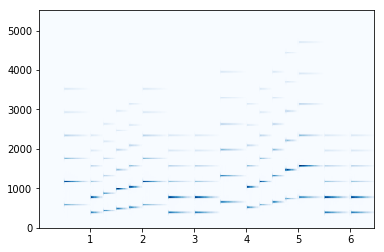

In [3]:
spg_wave = wave.make_spectrogram(seg_length=512)
spg_wave.plot()

In [4]:
#signal = thinkdsp.UncorrelatedUniformNoise()
signal = thinkdsp.BrownianNoise()
uu_noise = signal.make_wave(duration=wave.duration, framerate=11025)
#sp = uu_noise.make_spectrum()
#sp.low_pass(4000)
#sp.high_pass(3000)
#uu_noise = sp.make_wave()
uu_noise.scale(5)
uu_noise.make_audio()

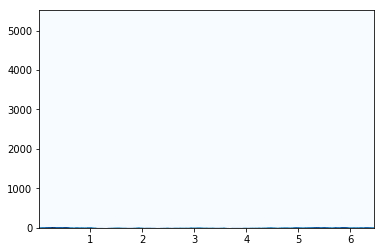

In [5]:
spg_noise = uu_noise.make_spectrogram(seg_length=512)
spg_noise.plot()

In [6]:
uuwave = wave + uu_noise
uuwave.normalize()
uuwave.make_audio()

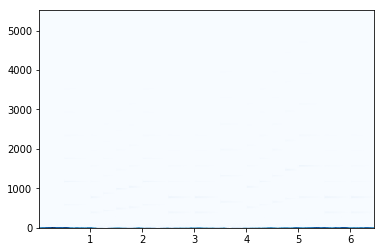

In [7]:
spg = uuwave.make_spectrogram(seg_length=512)
spg.plot()

In [14]:
spg = uuwave.make_spectrogram(seg_length=8192)
for j, t in enumerate(spg.times()):
    spectrum = spg.spec_map[t]
    for k in range(len(spectrum.amps)):
        if (spectrum.amps[k] < 25):
            spectrum.hs[k] = 0
#    spectrum.low_pass(1000)  
w = spg.make_wave()
w.make_audio()

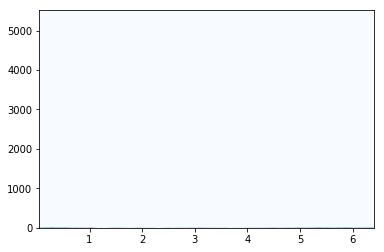

In [9]:
spg.plot()

In [15]:
spectrum = uuwave.make_spectrum()
for k in range(len(spectrum.amps)):
    if (spectrum.amps[k] < 20):
        spectrum.hs[k] = 0
w2 = spectrum.make_wave()
w2.make_audio()

In [11]:
print(np.max(spectrum.amps))
print(np.mean(spectrum.amps))
print(np.min(spectrum.amps))




18515.88118662256
4.8776502805050495
0.0


In [12]:
spectrum = uu_noise.make_spectrum()
print(np.max(spectrum.amps))
print(np.mean(spectrum.amps))
print(np.min(spectrum.amps))




101283.11003127736
27.830911735681678
3.22732951474336e-11


In [13]:
sp = uuwave.make_spectrum()
sp.high_pass(400)
w3 = sp.make_wave()
w3.make_audio()